In [8]:
from utils.configuration import get_config_from_json
from utils.training_utilities import set_GPU
from utils.plotting_traces import plot_traces
from seq2point.seq2point import SEQ2POINT
import builtins
import os

builtins.GENERAL_CONFIG = get_config_from_json(description="General Settings", config_file="configs/general_config.json")
builtins.MODEL_CONFIG = get_config_from_json(description="Model Parameters", config_file="configs/model_config.json")
builtins.TRAINING_CONFIG = get_config_from_json(description="Training Configuration", config_file="configs/training_config.json")
builtins.PLOT_CONFIG = get_config_from_json(description="Plot Settings", config_file="configs/plot_config.json")

Followings are the General Settings of your project..
{'DATA_PATH': 'data/refit/',
 'DESCRIPTION': 'General Settings',
 'LOAD_MODEL': '',
 'PRE_TRAINED_MODEL_FLAG': False,
 'SAVE_PATH': 'models/'}

Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': [0],
 'CONV_STRIDE': [1],
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized

Followings are the Training Configuration of your experiment..
{'DESCRIPTION': 'Training Configuration',
 'EARLY_STOPPING_THRESHOLD': 3,
 'LEARNING_RATE': 0.001,
 'LOSS': 'nn.MSELoss',
 'LOSS_REDUCTION': 'mean',
 'NUM_EPOCHS': 10,
 'OPTIMIZER': 'optim.Adam',
 'TRAIN_BATCH_SIZE': 64}

Summary of the mo

C:\Users\mahno\Anaconda\envs\torchy\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch : [2/10] | Training Loss : 0.005236958619207144, | Validation Loss : 0.01991751790046692, | Time consumption: 0.008044719696044922s
Epoch : [3/10] | Training Loss : 0.0032953061163425446, | Validation Loss : 0.3732479512691498, | Time consumption: 0.007981538772583008s
Epoch : [4/10] | Training Loss : 0.1339956372976303, | Validation Loss : 0.0013429168611764908, | Time consumption: 0.0s
Earlystopping is calling it off because validation loss did not improve after 3 epochs, therefore e
Followings are the Plot Settings of your project..
{'COLORS': ['dodgerblue',
            'coral',
            'mediumpurple',
            'lightseagreen',
            'peru',
            'hotpink',
            'teal',
            'orange'],
 'DESCRIPTION': 'Plot Settings',
 'FIG_XSIZE': 14.0,
 'FIG_YSIZE': 6.0,
 'FONT_SIZE': 12.0,
 'LATEX': False,
 'LEGEND_FONT_SIZE': 11.0,
 'LEGEND_HANDLE': 5.0,
 'LEGEND_LOCATION': 'upper right',
 'MAJOR_TICKS': 5.0,
 'MARKER': 'o',
 'MINOR_TICKS': 3.0,
 'OPACITY'

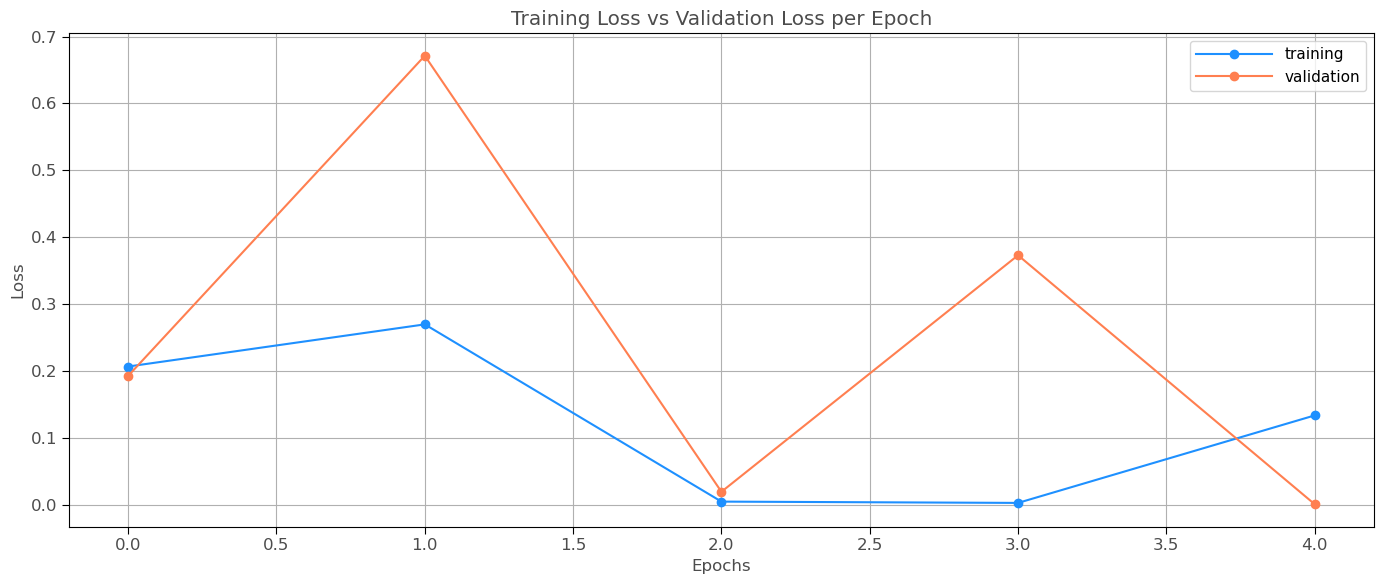

In [6]:

def main():
    
    print(f"Followings are the {GENERAL_CONFIG['DESCRIPTION']} of your project..")
    pprint(GENERAL_CONFIG)
    
    
    ###### random seed selection in progress

    random_seed = 10
    random.seed(random_seed)
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


    model = SEQ2POINT().to(set_GPU())



    train_loader = torch.randn(599,2)
    validation_loader = torch.randn(2,2)

    train_mains,valid_mains,train_appliance,valid_appliance = train_test_split(mains, appliance, test_size=.2, random_state = random_seed)

    # train_dataset = TensorDataset(torch.from_numpy(train_mains).float().permute(0,2,1), torch.from_numpy(train_appliance).float())
    # train_loader = tud.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 0, drop_last = True)

    # validation_dataset = TensorDataset(torch.from_numpy(valid_mains).float().permute(0,2,1), torch.from_numpy(valid_appliance).float())
    # validation_loader = tud.DataLoader(valid_dataset, batch_size = batch_size, shuffle = True, num_workers = 0, drop_last = True)

    train_loss, validation_loss = model.run(train_loader, validation_loader)
    
    model = SEQ2POINT().to(set_GPU())
    
    train_loss, validation_loss = model.run()
    
    plot_traces(traces = [train_loss, validation_loss], labels=['training', 'validation'], axis_labels=['Epochs', 'Loss'], title='Training Loss vs Validation Loss per Epoch')
    

if __name__ == "__main__":
    main()